Loading and Prepping Data

In [41]:
import os
import random
import glob
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and shuffle data
DATASET_DIR = os.path.join(os.getcwd(), "..", "data")
data_images = glob.glob(os.path.join(DATASET_DIR, "images", "*.jpg"))
data_masks = glob.glob(os.path.join(DATASET_DIR, "masks", "*.png"))

# Shuffle the data paths before data preparation.
zipped_data = list(zip(data_images, data_masks))
random.shuffle(zipped_data)
data_images, data_masks = zip(*zipped_data)
data_images = list(data_images)
data_masks = list(data_masks)

Mask Generation

In [50]:
def load_image_and_mask(image_path, mask_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Load mask
    mask = cv2.imread(mask_path, cv2.COLOR_BGR2RGB)
    print("Unique values in the ", mask_path, " mask:", np.unique(mask))
    # Adjust mask color mapping
    mask = np.where(mask == 255, 0, 0)  # Map 38 to 1 for plant disease, 0 for background
    
    return image, mask

def preprocess_data(image_paths, mask_paths):
    images = []
    masks = []
    for img_path, mask_path in zip(image_paths, mask_paths):
        img, mask = load_image_and_mask(img_path, mask_path)
        images.append(img)
        masks.append(mask)
    return images, masks

# Load and preprocess data
train_images, train_masks = preprocess_data(data_images, data_masks)

Unique values in the mask: [  0 128]
Unique values in the mask: [  0 128]
Unique values in the mask: [  0 128]
Unique values in the mask: [  0 128]
Unique values in the mask: [  0 128]
Unique values in the mask: [  0 128]
Unique values in the mask: [  0 128]
Unique values in the mask: [  0 128]
Unique values in the mask: [  0 128]
Unique values in the mask: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  96  97  98  99 100 101 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128]
Unique values in the mask: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25

Visualization

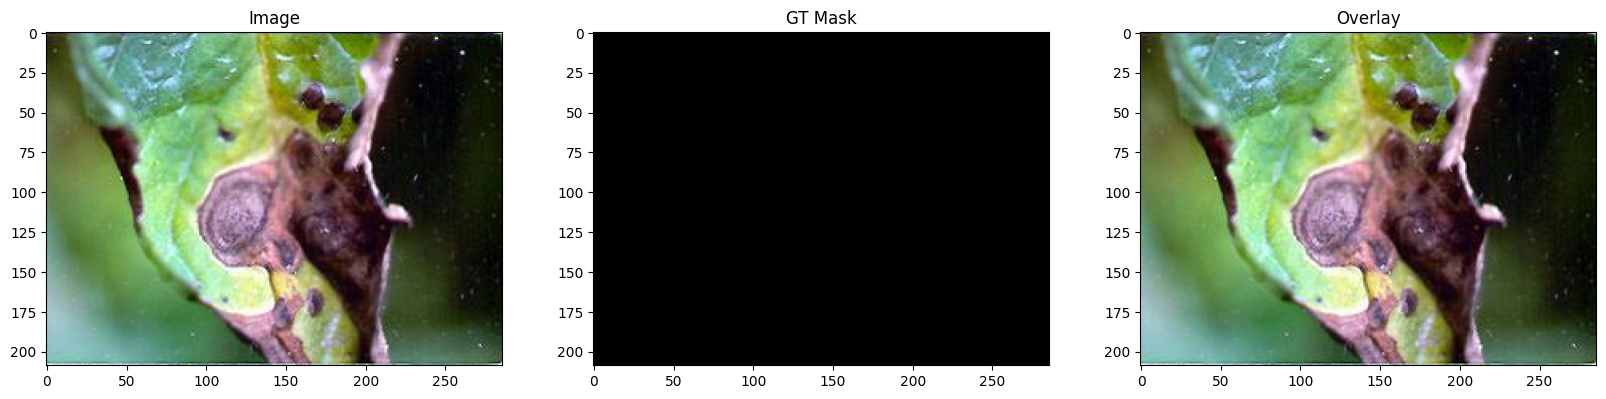

In [48]:
def overlay_mask_on_image(image, mask, alpha=0.5):
    # Create an overlay by combining the image and the mask
    overlay = image.copy()
    #overlay[mask == 1] = (255, 0, 0)  # Red color for the mask
    combined = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)
    return combined

def display_image_and_mask(images, title_list=None, figsize=(20, 8), color_mask=False):
    fig, axs = plt.subplots(1, len(images), figsize=figsize)
    if title_list is None:
        title_list = ["Image", "GT Mask", "Overlay"]
    for i, (img, title) in enumerate(zip(images, title_list)):
        axs[i].imshow(img, cmap='gray' if color_mask else None)
        axs[i].set_title(title)
    plt.show()

# Example visualization
sample_image, sample_mask = train_images[0], train_masks[0]
overlay_image = overlay_mask_on_image(sample_image, sample_mask)
display_image_and_mask([sample_image, sample_mask, overlay_image], title_list=["Image", "GT Mask", "Overlay"], color_mask=True)

Model Training and Evaluation